In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# load bp
with open("bp.csv", 'r') as bp_file:
    data = pd.read_csv(bp_file, sep=';')

print("BP file columns:\n\n%s" % data.columns)

# get first and second col and change representation to numpy-like
distance = data[data.columns[16]].as_matrix()
dose = data[data.columns[17]].as_matrix()

distance = np.nan_to_num(distance)
dose = np.nan_to_num(dose)

peak_max_position = distance[dose.argmax()]
print("\nDose == 1 is at range %s for %s" % (peak_max_position, data.columns[17]))

BP file columns:

Index(['x0', 'rs0', 'x0.955', 'y0.955', 'x1000', 'rs1000', 'x2000', 'y2000',
       'x3000', 'rs3000', 'x', 'rs4000', 'x.1', 'rs5000', 'x.2', 'rs6000',
       'x.3', 'rs7000', 'x.4', 'rs8000', 'x.5', 'rs9000', 'x.6', 'rs10000',
       'x.7', 'rs11000', 'x.8', 'rs12000', 'x.9', 'rs13000', 'x.10', 'rs14000',
       'x.11', 'rs15000', 'x.12', 'rs16000', 'x.13', 'rs17000', 'x.14',
       'rs18000'],
      dtype='object')

Dose == 1 is at range 18.9 for rs7000


In [3]:
# load file with positions and weights
with open("pos.txt", "r") as pos_file:
    pos_we_data = pd.read_csv(pos_file, sep=';')

positions = pos_we_data['position'].as_matrix()
weights = pos_we_data['weight'].as_matrix()

print("Positions: %s" % positions)
print("Weights: %s " % weights)

Positions: [ 12.  14.  18.  20.  24.  26.]
Weights: [ 0.1    0.05   0.125  0.225  0.15   0.35 ] 


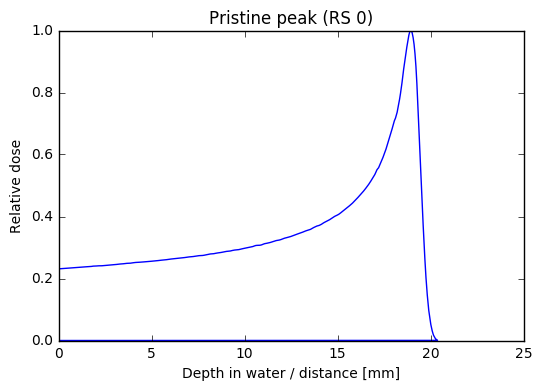

In [4]:
plt.plot(distance, dose)
plt.title("Pristine peak (RS 0)")
plt.xlabel("Depth in water / distance [mm]")
plt.ylabel("Relative dose")

In [5]:
def fit_fun3(x, a, b, c):
    return a*x**2 + b*x + c

def fit_fun4(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def fit_fun5(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

coeffs3, _ = curve_fit(fit_fun3, distance, dose)
coeffs4, _ = curve_fit(fit_fun4, distance, dose)
coeffs5, _ = curve_fit(fit_fun5, distance, dose)

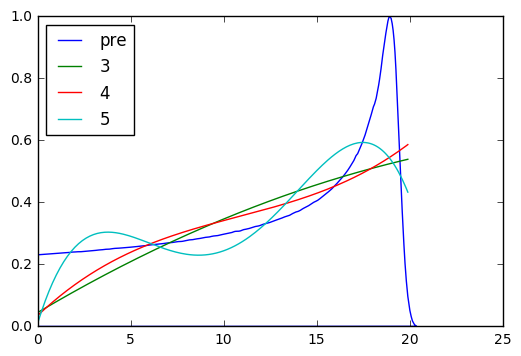

In [7]:
new_domain = np.arange(0, 20, 0.1)

fitted3 = fit_fun3(new_domain, coeffs3[0], coeffs3[1], coeffs3[2])
fitted4 = fit_fun4(new_domain, coeffs4[0], coeffs4[1], coeffs4[2], coeffs4[3])
fitted5 = fit_fun5(new_domain, coeffs5[0], coeffs5[1], coeffs5[2], coeffs5[3], coeffs5[4])

pre, = plt.plot(distance, dose, label="pre")
plot3, = plt.plot(new_domain, fitted3, label="3")
plot4, = plt.plot(new_domain, fitted4, label="4")
plot5, =plt.plot(new_domain, fitted5, label="5")
plt.legend(handles=[pre, plot3, plot4, plot5], loc=2)